In [85]:
# Import the main libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Data preprocessing

#### First, we will import the two different datasets of white and red whine from a website:

In [87]:
white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep =';')
red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep =';')

In [88]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [89]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### At first sight, we can see that the two datasets are composed of the same columns with similar information. Our target is the quality of the wine.

#### We can start by doing an exploratory analysis of the datasets. First, we obtain some statistical parameters, since this information can be useful if there is a low percentage of NaN or null values that we want to fill.

In [91]:
white.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


In [92]:
red.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


#### Now, let's find if there are Nan/null values in the datasets.

In [94]:
white.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [95]:
red.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Exploratory Data Analysis

#### Now that we know that there are no Nan/null values in the datasets, we can start by analysing the correlation between the different parameters in the dataset

### White wine

Text(0.5, 1.0, 'Correlation map for white wine')

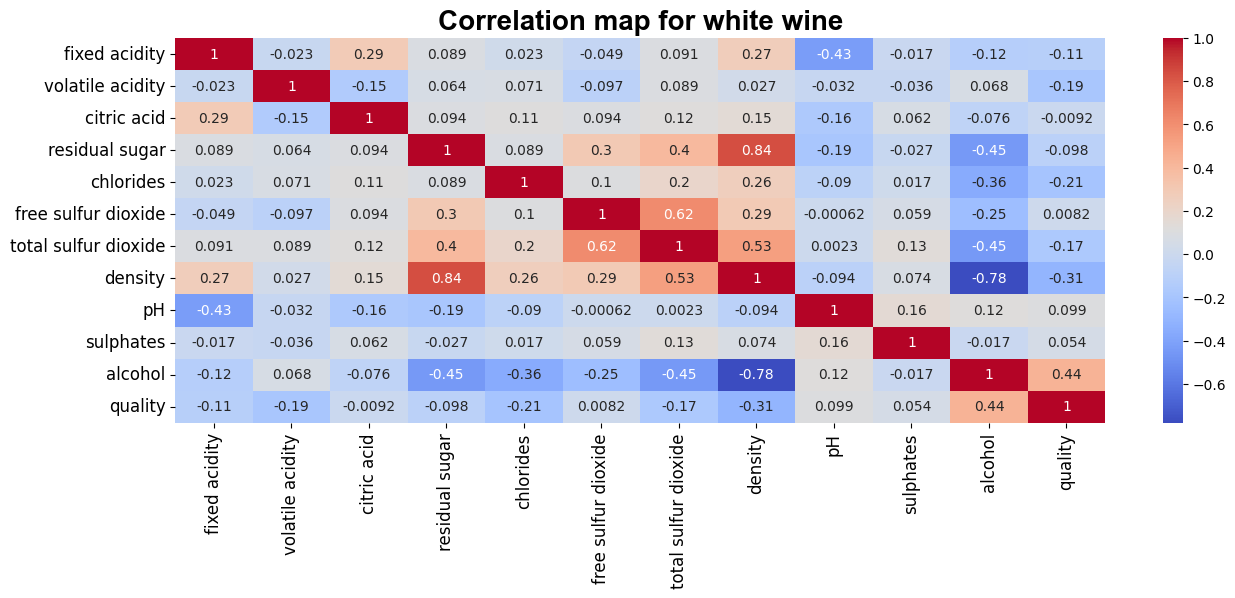

In [97]:
corr_white = white.corr()

plt.figure(figsize=(15,5))
sns.heatmap(corr_white, annot = True, cmap = 'coolwarm')
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title('Correlation map for white wine', fontsize = 20, fontweight='bold', **csfont)

#### From this correlation map, we can conclude that the quality of white wine present some relation with:

#### Positive correlation (As one variable increases, the other tends to increase)
#### - Alcohol (0.44)
#### - pH (0.099)
#### - sulphates (0.054)

#### Negative correlation (As one variable increases, the other tends to decrease)
#### - Density (-0.31)
#### - Chlorides (-0.21)
#### - Volatile acidity (-0.19)
#### - Total sulfur dioxide (-0.17)

### Red whine

Text(0.5, 1.0, 'Correlation map for red wine')

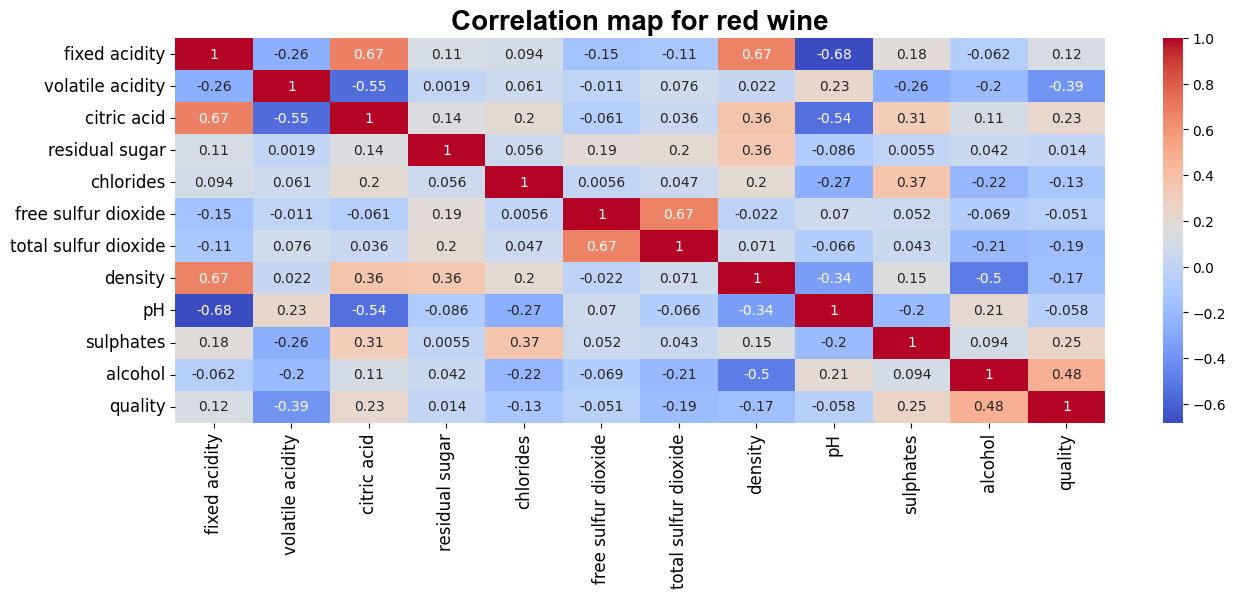

In [112]:
corr_red = red.corr()

plt.figure(figsize=(15,5))
sns.heatmap(corr_red, annot = True, cmap = 'coolwarm')
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title('Correlation map for red wine', fontsize = 20, fontweight='bold', **csfont)

#### From this correlation map, we can conclude that the quality of red wine present some relation with:

#### Positive correlation (As one variable increases, the other tends to increase)
#### - Alcohol (0.48)
#### - sulphates (0.25)
#### - Citric acid (0.23)
#### - Fixed acidity (0.12)

#### Negative correlation (As one variable increases, the other tends to decrease)
#### - Volatile acidity (-0.39)
#### - Total sulfur dioxide (-0.19)
#### - Density (-0.17)
#### - Chlorides (-0.13)

#### We can see that there is a stronger positive correlation with some values that affect the quality of red wine more than we observed for white wine.

## Train/test splitting

#### Before dividing the data for train and test, it is necessary to join the two datasets in one. For that, we are going to create a new dataset where we will include the column "type" in order to know if the wine is white (0) or red (1).

In [126]:
white['type'] = 0  # Adding a column of 0's in the white dataset
red['type'] = 1    # Adding a column of 1's in the red dataset
wines = pd.concat([white, red], ignore_index = True)  # Joining the red dataset to the white dataset in a new dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


In [148]:
X = wines.iloc[:, :-1].values
y = wines.iloc[:, -1].values

# First we need to apply a standard scaler to the numerical variables since the algorithms work better with scaled numerical features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 19)

## Creating the neural network

In [152]:
!pip install tensorflow

  Using cached protobuf-4.25.5-cp310-abi3-win_amd64.whl.metadata (541 bytes)
  Using cached Markdown-3.7-py3-none-any.whl.metadata (7.0 kB)
Using cached protobuf-4.25.5-cp310-abi3-win_amd64.whl (413 kB)
Using cached Markdown-3.7-py3-none-any.whl (106 kB)
   ---------------------------------------- 0.0/224.5 kB ? eta -:--:--
   - -------------------------------------- 10.2/224.5 kB ? eta -:--:--
   - -------------------------------------- 10.2/224.5 kB ? eta -:--:--
   - -------------------------------------- 10.2/224.5 kB ? eta -:--:--
   ----- --------------------------------- 30.7/224.5 kB 163.8 kB/s eta 0:00:02
   ----- --------------------------------- 30.7/224.5 kB 163.8 kB/s eta 0:00:02
   ------------ -------------------------- 71.7/224.5 kB 280.5 kB/s eta 0:00:01
   ------------------------- ------------ 153.6/224.5 kB 573.4 kB/s eta 0:00:01
   ------------------------------------ - 215.0/224.5 kB 689.6 kB/s eta 0:00:01
   -------------------------------------- 224.5/224.5 kB 6

In [154]:
tf.__version__

'2.16.1'

In [156]:
import tensorflow as tf

In [173]:
ann = tf.keras.models.Sequential()   # We create the object

ann.add(tf.keras.layers.Dense(units = 12, activation = 'relu'))     # Add an input layer
ann.add(tf.keras.layers.Dense(units = 9, activation = 'relu'))      # Add a hidden layer
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))   # Add the final output layer (sigmoid because the output is binary)
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])   # Compile the ANN

ann.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

#### Once the ANN is created, we can train it using the training set

In [196]:
ann.fit(X_train, y_train, batch_size = 1, epochs = 5)

Epoch 1/5
5197/5197 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.9980 - loss: 0.0093
Epoch 2/5
5197/5197 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.9955 - loss: 0.0137
Epoch 3/5
5197/5197 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.9963 - loss: 0.0135
Epoch 4/5
5197/5197 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.9971 - loss: 0.0169
Epoch 5/5
5197/5197 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.9980 - loss: 0.0095


#### Now we can predict the results of the test size

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

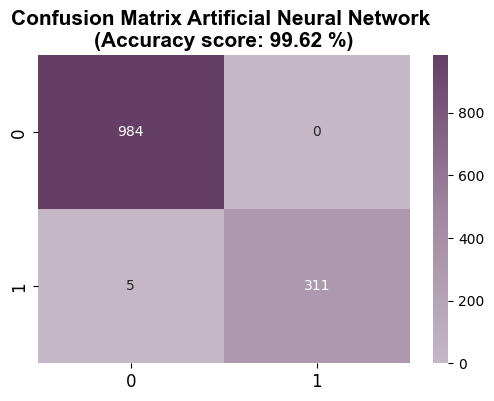

In [198]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)   # We need to apply a threshold, since we are going to obtaine values between 0 and 1 instead of 0's or 1's, so we apply
                          # that if y_pred > 0.5 = 1, and if y_pred < 0.5 = 0

from sklearn.metrics import accuracy_score, confusion_matrix

cm = confusion_matrix(y_test, y_pred)  # Generate the confusion matrix

from matplotlib.colors import LinearSegmentedColormap
colors = ["#c5b7c6", "#9f869f", "#653e66"]  # Light purple to dark purple
custom_cmap = LinearSegmentedColormap.from_list("purple_custom", colors) # Custom map for the confusion matrix

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot = True, fmt='d', cmap = custom_cmap)   # Plot the confusion matrix into a heatmap
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title(f'Confusion Matrix Artificial Neural Network \n(Accuracy score: {accuracy_score(y_test, y_pred)*100:.2f} %)', fontsize = 15, fontweight='bold', **csfont)
plt.tight_layout